In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Agregación de datos x categoría

In [2]:
gender = ['male', 'female']
income = ['poor', 'middle', 'rich']

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
print(gender_data[1:6], income_data[1:6])

['female', 'male', 'male', 'male', 'female'] ['rich', 'poor', 'middle', 'rich', 'middle']


In [5]:
#fórmula: media + std * Z
height = 170 + 20 * np.random.randn(n) #distribución normal con media de 1.60 mts y std de 30 cms
weight = 75 + 15 * np.random.randn(n) #idem para el peso
age = 30 + 12 * np.random.rand(n) #edad
income = 18000 * 3500 * np.random.rand(n)

In [6]:
data = pd.DataFrame(
    {
        'gender':gender_data,
        'economic':income_data,
        'height':height,
        'weight':weight,
        'age':age,
        'income':income
    }
)

In [7]:
data['age'] = data['age'].astype(int)

In [8]:
data.describe(include='all')

,gender,economic,height,weight,age,income
count,500,500,500.000000,500.000000,500.000000,5.000000e+02
unique,2,3,NaN,NaN,NaN,NaN
top,female,rich,NaN,NaN,NaN,NaN
freq,264,175,NaN,NaN,NaN,NaN
mean,NaN,NaN,171.029785,73.653211,35.402000,3.011624e+07
std,NaN,NaN,19.087635,15.503378,3.495831,1.848694e+07
min,NaN,NaN,103.092620,28.651135,30.000000,6.962327e+04
25%,NaN,NaN,158.002069,62.967507,32.000000,1.387742e+07
50%,NaN,NaN,171.143483,73.616644,36.000000,3.051414e+07
75%,NaN,NaN,183.835457,83.689020,38.000000,4.593819e+07


## agrupación

In [9]:
group_gender = data.groupby("gender")
group_gender.groups

{'female': Int64Index([  0,   1,   5,   6,   7,  11,  12,  14,  16,  18,
             ...
             484, 486, 488, 490, 491, 492, 494, 495, 497, 498],
            dtype='int64', length=264),
 'male': Int64Index([  2,   3,   4,   8,   9,  10,  13,  15,  17,  19,
             ...
             475, 476, 477, 478, 485, 487, 489, 493, 496, 499],
            dtype='int64', length=236)}

In [10]:
#recorrer el agrupamiento:
for name, group in group_gender:
    print("nombre: ", name, "grupo: ", group)    

nombre:  female grupo:       gender economic      height     weight  age        income
0    female     poor  179.540375  61.004714   34  5.308074e+07
1    female     rich  152.905693  60.438081   37  4.606577e+07
5    female   middle  164.017435  86.259476   34  1.388265e+07
6    female     rich  153.218868  72.889607   36  4.231419e+07
7    female     rich  152.886635  70.704495   32  3.572920e+07
..      ...      ...         ...        ...  ...           ...
492  female     poor  178.660501  58.197605   33  6.180644e+07
494  female     poor  180.229473  62.930241   30  4.227673e+07
495  female     poor  160.501761  75.403340   38  1.437166e+06
497  female   middle  175.193395  86.477670   41  2.913889e+07
498  female     poor  172.409713  85.868580   38  3.365499e+07

[264 rows x 6 columns]
nombre:  male grupo:      gender economic      height     weight  age        income
2     male     poor  139.166620  84.616808   33  5.330964e+06
3     male   middle  129.457123  68.295391   33  3

In [11]:
#mostrar el agrupamiento de otra forma:
group_gender.get_group('male')

,gender,economic,height,weight,age,income
2,male,poor,139.166620,84.616808,33,5.330964e+06
3,male,middle,129.457123,68.295391,33,3.442997e+07
4,male,rich,159.383211,74.025402,34,2.762170e+07
8,male,poor,195.573529,56.273567,38,1.416749e+07
9,male,middle,141.538779,77.047590,38,6.224795e+07
...,...,...,...,...,...,...
487,male,rich,181.413082,45.231023,40,6.165214e+07
489,male,rich,189.657932,70.261319,33,4.152201e+07
493,male,rich,157.224583,82.682448,32,3.572873e+07
496,male,rich,171.874207,42.339266,35,4.688106e+07


## agrupo por dos campos

In [12]:
double_group = data.groupby(['gender', 'economic'])
len(double_group) #arroja 6: 2 categorías gender y 3 categorias economic

6

In [13]:
#recorrer el agrupamiento:
for name, group in double_group:
    print("nombre: ", name, "grupo: ", group)    

nombre:  ('female', 'middle') grupo:       gender economic      height      weight  age        income
5    female   middle  164.017435   86.259476   34  1.388265e+07
11   female   middle  156.669855   61.485174   41  2.351690e+07
14   female   middle  138.460193   40.676720   32  1.391220e+07
23   female   middle  168.597009   54.871107   32  4.592974e+07
26   female   middle  185.577895   41.934098   41  3.561563e+07
..      ...      ...         ...         ...  ...           ...
479  female   middle  161.589297  112.324965   38  4.337446e+07
480  female   middle  150.564679   74.842728   34  7.104725e+06
481  female   middle  166.933595   70.475705   40  2.270764e+07
486  female   middle  172.560274   78.942401   41  5.498194e+07
497  female   middle  175.193395   86.477670   41  2.913889e+07

[92 rows x 6 columns]
nombre:  ('female', 'poor') grupo:       gender economic      height     weight  age        income
0    female     poor  179.540375  61.004714   34  5.308074e+07
12   fema

## tomo dos "sub_grupos": a los hombres ricos:

In [14]:
double_group.get_group(('male', 'rich'))

,gender,economic,height,weight,age,income
4,male,rich,159.383211,74.025402,34,2.762170e+07
20,male,rich,149.190955,89.145198,30,4.989156e+05
22,male,rich,169.004179,67.320698,34,3.581227e+07
25,male,rich,204.422507,89.282867,39,4.949496e+07
51,male,rich,183.172157,80.907665,33,6.015446e+07
...,...,...,...,...,...,...
487,male,rich,181.413082,45.231023,40,6.165214e+07
489,male,rich,189.657932,70.261319,33,4.152201e+07
493,male,rich,157.224583,82.682448,32,3.572873e+07
496,male,rich,171.874207,42.339266,35,4.688106e+07


## mujeres de clase media

In [15]:
double_group.get_group(('female', 'middle'))

,gender,economic,height,weight,age,income
5,female,middle,164.017435,86.259476,34,1.388265e+07
11,female,middle,156.669855,61.485174,41,2.351690e+07
14,female,middle,138.460193,40.676720,32,1.391220e+07
23,female,middle,168.597009,54.871107,32,4.592974e+07
26,female,middle,185.577895,41.934098,41,3.561563e+07
...,...,...,...,...,...,...
479,female,middle,161.589297,112.324965,38,4.337446e+07
480,female,middle,150.564679,74.842728,34,7.104725e+06
481,female,middle,166.933595,70.475705,40,2.270764e+07
486,female,middle,172.560274,78.942401,41,5.498194e+07


## funciones sobre los grupos

In [16]:
double_group.sum()

height       weight   age        income
gender economic                                               
female middle    15814.526885  6887.896547  3273  2.607398e+09
       poor      13815.500363  5926.045520  2827  2.532097e+09
       rich      15623.351916  6758.799604  3219  2.709733e+09
male   middle    12755.444270  5540.759082  2656  2.165008e+09
       poor      12939.121750  5449.185006  2744  2.194738e+09
       rich      14566.947387  6263.919528  2982  2.849149e+09

In [17]:
double_group.count()

height  weight  age  income
gender economic                             
female middle        92      92   92      92
       poor          81      81   81      81
       rich          91      91   91      91
male   middle        75      75   75      75
       poor          77      77   77      77
       rich          84      84   84      84

In [18]:
double_group.size()

gender  economic
female  middle      92
        poor        81
        rich        91
male    middle      75
        poor        77
        rich        84
dtype: int64

In [19]:
double_group.describe()

height                                                 \
                 count        mean        std         min         25%   
gender economic                                                         
female middle     92.0  171.897031  19.190594  118.220975  158.592510   
       poor       81.0  170.561733  20.280243  133.843773  157.863669   
       rich       91.0  171.685186  18.856757  126.838095  159.390325   
male   middle     75.0  170.072590  18.798351  129.457123  155.752525   
       poor       77.0  168.040542  20.349659  103.092620  153.636188   
       rich       84.0  173.416040  17.146726  139.886097  160.095678   

                                                    weight             ...  \
                        50%         75%         max  count       mean  ...   
gender economic                                                        ...   
female middle    172.018590  184.556967  212.813262   92.0  74.868441  ...   
       poor      170.177058  181.717579  229.425423   81.0  73.161056  ...   
       rich      170.361630  181.639853  223.472699   91.0  74.272523  ...   
male   middle    173.027579  185.369617  207.137173   75.0  73.876788  ...   
       poor      168.061607  182.791135  210.178089   77.0  70.768636  ...   
       rich      172.077726  185.271074  213.554631   84.0  74.570471  ...   

                  age       income                                            \
                  75%   max  count          mean           std           min   
gender economic                                                                
female middle    38.0  41.0   92.0  2.834128e+07  1.880885e+07  6.962327e+04   
       poor      38.0  41.0   81.0  3.126046e+07  1.932896e+07  1.437166e+06   
       rich      38.0  41.0   91.0  2.977728e+07  1.764468e+07  2.779715e+05   
male   middle    38.5  41.0   75.0  2.886677e+07  2.005540e+07  1.047245e+05   
       poor      38.0  41.0   77.0  2.850308e+07  1.770236e+07  3.867805e+05   
       rich      39.0  41.0   84.0  3.391844e+07  1.732771e+07  2.035309e+05   

                                                                         
                          25%           50%           75%           max  
gender economic                                                          
female middle    1.147513e+07  2.709453e+07  4.423259e+07  6.214903e+07  
       poor      1.367863e+07  3.225029e+07  4.731997e+07  6.180644e+07  
       rich      1.541922e+07  2.968062e+07  4.290590e+07  6.273379e+07  
male   middle    1.009139e+07  2.966215e+07  4.712936e+07  6.297960e+07  
       poor      1.337998e+07  2.798805e+07  4.375912e+07  6.209822e+07  
       rich      2.180234e+07  3.459524e+07  4.727657e+07  6.170380e+07  

[6 rows x 32 columns]

## describe() de un solo grupo

In [20]:
double_group['income'].describe()

count          mean           std           min  \
gender economic                                                    
female middle     92.0  2.834128e+07  1.880885e+07  6.962327e+04   
       poor       81.0  3.126046e+07  1.932896e+07  1.437166e+06   
       rich       91.0  2.977728e+07  1.764468e+07  2.779715e+05   
male   middle     75.0  2.886677e+07  2.005540e+07  1.047245e+05   
       poor       77.0  2.850308e+07  1.770236e+07  3.867805e+05   
       rich       84.0  3.391844e+07  1.732771e+07  2.035309e+05   

                          25%           50%           75%           max  
gender economic                                                          
female middle    1.147513e+07  2.709453e+07  4.423259e+07  6.214903e+07  
       poor      1.367863e+07  3.225029e+07  4.731997e+07  6.180644e+07  
       rich      1.541922e+07  2.968062e+07  4.290590e+07  6.273379e+07  
male   middle    1.009139e+07  2.966215e+07  4.712936e+07  6.297960e+07  
       poor      1.337998e+07  2.798805e+07  4.375912e+07  6.209822e+07  
       rich      2.180234e+07  3.459524e+07  4.727657e+07  6.170380e+07

In [21]:
double_group['gender'].describe()

count unique     top freq
gender economic                          
female middle      92      1  female   92
       poor        81      1  female   81
       rich        91      1  female   91
male   middle      75      1    male   75
       poor        77      1    male   77
       rich        84      1    male   84

## con `aggregate` creo columnas con otros datos:

In [22]:
double_group.aggregate(
    {
        'age':np.sum,
        'income':np.std,
    }
)

age        income
gender economic                    
female middle    3273  1.880885e+07
       poor      2827  1.932896e+07
       rich      3219  1.764468e+07
male   middle    2656  2.005540e+07
       poor      2744  1.770236e+07
       rich      2982  1.732771e+07

In [23]:
double_group.aggregate(
    {
        'age':np.mean,
        'income': lambda i: np.mean(i)/np.std(i)
    }
)

age    income
gender economic                     
female middle    35.576087  1.515062
       poor      34.901235  1.627363
       rich      35.373626  1.696957
male   middle    35.413333  1.449044
       poor      35.636364  1.620688
       rich      35.500000  1.969225

## otra forma de colocar funciones dentro de los grupos

In [24]:
double_group.aggregate([np.sum, np.mean, np.median, np.std])

height                                          weight  \
                          sum        mean      median        std          sum   
gender economic                                                                 
female middle    15814.526885  171.897031  172.018590  19.190594  6887.896547   
       poor      13815.500363  170.561733  170.177058  20.280243  5926.045520   
       rich      15623.351916  171.685186  170.361630  18.856757  6758.799604   
male   middle    12755.444270  170.072590  173.027579  18.798351  5540.759082   
       poor      12939.121750  168.040542  168.061607  20.349659  5449.185006   
       rich      14566.947387  173.416040  172.077726  17.146726  6263.919528   

                                                   age                    \
                      mean     median        std   sum       mean median   
gender economic                                                            
female middle    74.868441  74.824042  16.642647  3273  35.576087     36   
       poor      73.161056  73.470457  15.637526  2827  34.901235     35   
       rich      74.272523  73.769007  14.807222  3219  35.373626     36   
male   middle    73.876788  71.759678  14.245386  2656  35.413333     35   
       poor      70.768636  69.987817  16.266456  2744  35.636364     36   
       rich      74.570471  74.766274  15.290280  2982  35.500000     35   

                                 income                              \
                      std           sum          mean        median   
gender economic                                                       
female middle    3.436180  2.607398e+09  2.834128e+07  2.709453e+07   
       poor      3.519961  2.532097e+09  3.126046e+07  3.225029e+07   
       rich      3.472586  2.709733e+09  2.977728e+07  2.968062e+07   
male   middle    3.575795  2.165008e+09  2.886677e+07  2.966215e+07   
       poor      3.531472  2.194738e+09  2.850308e+07  2.798805e+07   
       rich      3.514171  2.849149e+09  3.391844e+07  3.459524e+07   

                               
                          std  
gender economic                
female middle    1.880885e+07  
       poor      1.932896e+07  
       rich      1.764468e+07  
male   middle    2.005540e+07  
       poor      1.770236e+07  
       rich      1.732771e+07

## uso de `lambda`

In [25]:
double_group.aggregate(lambda x: np.mean(x)/np.std(x))

height    weight        age    income
gender economic                                          
female middle     9.006440  4.523240  10.410114  1.515062
       poor       8.462642  4.707707   9.977012  1.627363
       rich       9.155146  5.043756  10.242973  1.696957
male   middle     9.108133  5.220938   9.970318  1.449044
       poor       8.311808  4.379116  10.157252  1.620688
       rich      10.174397  4.906277  10.162629  1.969225

## de la forma clásica:

In [26]:
df = pd.DataFrame({'categ': [1, 2, 1, 1, 2, 1], 
                   'produ': ['a', 'b', 'c', 'b', 'a', 'a'], 
                   'venta': [6, 2, 1, 4, 5, 2]})

In [27]:
df.groupby('categ').sum()

,venta
categ,
1,13
2,7


In [28]:
df.groupby(['categ', 'produ']).count()

venta
categ produ       
1     a          2
      b          1
      c          1
2     a          1
      b          1

In [29]:
df.groupby(['categ','produ']).agg(['count', 'mean'])

venta     
            count mean
categ produ           
1     a         2    4
      b         1    4
      c         1    1
2     a         1    5
      b         1    2

### para agrupar por índice:

In [30]:
df.groupby(level=0).mean()

,categ,venta
0,1,6
1,2,2
2,1,1
3,1,4
4,2,5
5,1,2


In [31]:
csv = pd.DataFrame({'2016-01':[1,2,1], '2016-02':[0,0,1], '2016-03':[1,1,2], 
                       '2016-04':[0,0,0], '2016-05':[0,0,1], '2016-06':[0,0,0]})
csv

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06
0,1,0,1,0,0,0
1,2,0,1,0,0,0
2,1,1,2,0,1,0


In [32]:
csv.groupby(pd.PeriodIndex(csv.columns, freq='Q'), axis=1).mean()

,2016Q1,2016Q2
0,0.666667,0.000000
1,1.000000,0.000000
2,1.333333,0.333333


## Transformación:

In [33]:
zscore = lambda x: (x - x.mean()) / x.std()

In [34]:
trans = double_group[['age', 'income']].transform(zscore)

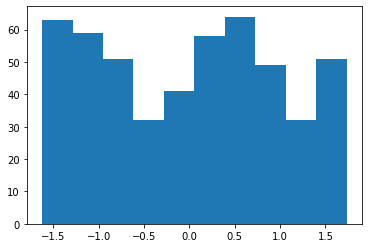

In [35]:
plt.hist(trans['age'])
plt.show()

In [36]:
#reemplazo los NaN con una labmda (colocando el promedio)
fill_na_mean = lambda x: x.fillna(x.mean())

In [37]:
trans.transform(fill_na_mean)

,age,income
0,-0.256035,1.128891
1,0.468347,0.923139
2,-0.746534,-1.308985
3,-0.674908,0.277392
4,-0.426843,-0.363391
...,...,...
495,0.880341,-1.542933
496,-0.142281,0.748086
497,1.578472,0.042406
498,0.880341,0.123883


### mostrar las primeras filas de cada grupo:

In [38]:
double_group.head(1)

,gender,economic,height,weight,age,income
0,female,poor,179.540375,61.004714,34,5.308074e+07
1,female,rich,152.905693,60.438081,37,4.606577e+07
2,male,poor,139.166620,84.616808,33,5.330964e+06
3,male,middle,129.457123,68.295391,33,3.442997e+07
4,male,rich,159.383211,74.025402,34,2.762170e+07
5,female,middle,164.017435,86.259476,34,1.388265e+07


In [39]:
#la enésima fila de cada grupo
double_group.nth(32)

height     weight  age        income
gender economic                                          
female middle    163.319217  79.882627   37  5.430316e+07
       poor      229.425423  88.433683   41  2.506732e+06
       rich      174.452931  57.519356   33  3.649798e+07
male   middle    156.072647  70.471118   33  4.819792e+07
       poor      150.168765  77.980144   35  4.408323e+06
       rich      152.641152  75.364690   37  3.363978e+07

In [41]:
data.sort_values(['age', 'income'])

,gender,economic,height,weight,age,income
81,male,rich,192.535467,67.324462,30,2.035309e+05
20,male,rich,149.190955,89.145198,30,4.989156e+05
491,female,poor,172.335650,79.390611,30,2.095105e+06
326,male,middle,161.524211,70.628297,30,4.219673e+06
98,male,middle,173.027579,66.123579,30,4.292775e+06
...,...,...,...,...,...,...
486,female,middle,172.560274,78.942401,41,5.498194e+07
69,male,poor,153.636188,64.434199,41,5.503194e+07
119,female,middle,164.784531,70.724739,41,5.661529e+07
467,female,poor,160.001112,106.524285,41,5.887335e+07


## conjunto de train_test

**manualmente**

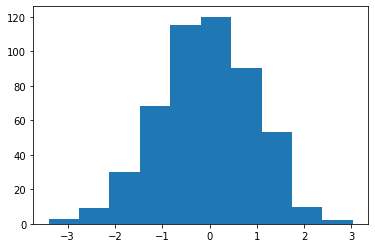

In [51]:
a = np.random.randn(len(data))
plt.hist(a)
plt.show()

In [52]:
check = (a<0.8)
train = data[check]
print("conjunto de train: ", len(train))

conjunto de train:  408


In [53]:
test = data[~check]
print("conjunto de test: ", len(test))

conjunto de test:  92


**con shuffle**
* ver como aparecen todos los índices mezclados:

In [57]:
from sklearn import utils

In [58]:
a = utils.shuffle(data)
a

,gender,economic,height,weight,age,income
161,female,middle,188.209445,85.286763,32,3.629207e+06
468,male,middle,149.191787,46.883211,41,5.241911e+07
14,female,middle,138.460193,40.676720,32,1.391220e+07
187,male,middle,195.815030,84.843426,36,3.359314e+07
176,male,rich,173.413518,68.941155,41,4.553552e+07
...,...,...,...,...,...,...
42,female,poor,172.249527,121.636844,41,1.878187e+07
429,male,poor,164.921466,65.667248,31,2.658030e+07
462,male,middle,169.063292,68.196389,30,4.746053e+07
347,male,middle,185.922187,80.647651,39,1.752538e+07


In [64]:
cut_id = int(0.75*len(data))
train = data[:cut_id]
test = data[cut_id:]
print(len(train))
print(len(test))
print(train + test)

375
125
    gender economic  height  weight  age  income
0      NaN      NaN     NaN     NaN  NaN     NaN
1      NaN      NaN     NaN     NaN  NaN     NaN
2      NaN      NaN     NaN     NaN  NaN     NaN
3      NaN      NaN     NaN     NaN  NaN     NaN
4      NaN      NaN     NaN     NaN  NaN     NaN
..     ...      ...     ...     ...  ...     ...
495    NaN      NaN     NaN     NaN  NaN     NaN
496    NaN      NaN     NaN     NaN  NaN     NaN
497    NaN      NaN     NaN     NaN  NaN     NaN
498    NaN      NaN     NaN     NaN  NaN     NaN
499    NaN      NaN     NaN     NaN  NaN     NaN

[500 rows x 6 columns]
